### Student Information
Name: 陳妘儒

Student ID: 113065541

GitHub ID: rheayunru

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [1]:
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap
%matplotlib inline
import helpers.data_mining_helpers as dmh

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns=['text'])
X['category'] = twenty_train.target
X['category_name'] = X['category'].apply(lambda t: dmh.format_labels(t, twenty_train))

## **Part1- Take home exercises**

### **>>> Exercise 2 (take home):** 

In [2]:
X.loc[X['category_name'] == 'alt.atheism']

text  category  \
12    From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...         0   
13    Subject: So what is Maddi? From: madhaus@netco...         0   
17    Organization: Penn State University From: <JSN...         0   
19    Subject: Re: Don't more innocents die without ...         0   
21    From: gmiller@worldbank.org (Gene C. Miller) S...         0   
...                                                 ...       ...   
2231  Subject: Re: Feminism and Islam, again From: k...         0   
2233  From: kmr4@po.CWRU.edu (Keith M. Ryan) Subject...         0   
2234  From: David.Rice@ofa123.fidonet.org Subject: i...         0   
2237  From: datepper@phoenix.Princeton.EDU (David Aa...         0   
2250  From: ingles@engin.umich.edu (Ray Ingles) Subj...         0   

     category_name  
12     alt.atheism  
13     alt.atheism  
17     alt.atheism  
19     alt.atheism  
21     alt.atheism  
...            ...  
2231   alt.atheism  
2233   alt.atheism  
2234   alt.atheism  
2237   alt.atheism  
2250   alt.atheism  

[480 rows x 3 columns]

In [3]:
X.iloc[:5, 0: 3]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian

### **>>> Exercise 5 (take home):** 

In [4]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [5]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [6]:
# Answer here

# .isnull() works only for actual missing data, such as np.nan and None. 
# 'NAN', 'NaN', 'None',and '' are not null, they are values instesd of missing values
# We can convert specific string values to actual missing values using .replace() before applying .isnull()

In [8]:
NA_df.replace(['NAN', 'NaN', 'None', ''], np.nan, inplace=True)

NA_df['missing_example'].isnull()

0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

### **>>> Exercise 6 (take home):** 

In [9]:
X[:10]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci.med  
9                 sci.med

In [10]:
X_sample = X.sample(n=1000) #random state
X_sample[:10]

text  category  \
108   From: mccullou@snake2.cs.wisc.edu (Mark McCull...         0   
730   From: halat@pooh.bears (Jim Halat) Subject: Re...         0   
1904  From: caralv@caralv.auto-trol.com (Carol Alvin...         3   
1910  From: Peter.vanderveen@visser.el.wau.nl  (Pete...         1   
2109  From: d9hh@dtek.chalmers.se (Henrik Harmsen) S...         1   
612   From: hendrix@oasys.dt.navy.mil (Dane Hendrix)...         1   
1833  From: 8910782@sunvax.sun.ac.za Subject: Raysha...         1   
1700  From: stephen@mont.cs.missouri.edu (Stephen Mo...         3   
1895  From: jfare@53iss6.Waterloo.NCR.COM (Jim Fare)...         2   
1957  From: ARowatt@massey.ac.nz (A.J. Rowatt) Subje...         1   

               category_name  
108              alt.atheism  
730              alt.atheism  
1904  soc.religion.christian  
1910           comp.graphics  
2109           comp.graphics  
612            comp.graphics  
1833           comp.graphics  
1700  soc.religion.christian  
1895                 sci.med  
1957           comp.graphics

In [11]:
# Answer here

#The differences between X and X_sample dataframes:

#1. Row Order: The rows in X_sample are in a different order compared to X. 
#   This is because X_sample was created using X.sample(n=1000), which takes a random sample of 1000 rows from X. 
#   The result is a reshuffled or randomized order of rows.

#2. Row Indexes: The index values in X_sample no longer start from 0 and follow a sequential order as they do in X. 
#   Instead, they reflect the original row indices from X.

#3. Number of Rows: The original X dataframe likely has more than 1000 rows since X.sample(n=1000) was able to sample a subset of this size. 
#   X_sample, therefore, only contains a portion of the rows from X.

### **>>> Exercise 8 (take home):** 

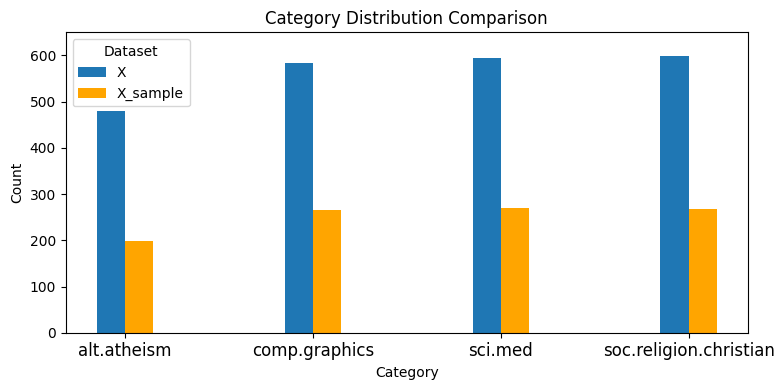

In [12]:
import matplotlib.pyplot as plt

# Retrieve data
X_sample = X.sample(n=1000)
X_sample_counts = X_sample.category_name.value_counts()
X_counts = X.category_name.value_counts()

# Ensure both datasets have the same category indices
categories = X_sample_counts.index.union(X_counts.index)  # Merge categories from both datasets

X_sample_counts = X_sample_counts.reindex(categories, fill_value=0)
X_counts = X_counts.reindex(categories, fill_value=0)

# Set bar width and positions
bar_width = 0.15
index = np.arange(len(categories))  # Create x-axis indices

# Create the plot
plt.figure(figsize=(8, 4))
plt.bar(index, X_counts, bar_width, label='X')  
plt.bar(index + bar_width, X_sample_counts, bar_width, label='X_sample', color='orange') 

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution Comparison')
plt.xticks(index + bar_width / 2, categories, rotation=0, fontsize=12)  # Set x-axis tick positions and labels
plt.ylim(0, 650)
plt.legend(title='Dataset')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


### **>>> Exercise 10 (take home):** 

In [13]:
import seaborn as sns

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

# Get the list of vocabulary terms, where each term corresponds to a column in the term-frequency matrix
vocab = count_vect.get_feature_names_out()

# Find all non-zero indices in the fifth row (index 4) of the term-frequency matrix
non_zero_indices = np.nonzero(X_counts.toarray()[4])[0]

# Access the second non-zero index in the fifth row
second_one = non_zero_indices[1]
words = vocab[second_one] 

print("The second 1 of the fifth record represents:", words)

The second 1 of the fifth record represents: 01


### **>>> Exercise 11 (take home):** 

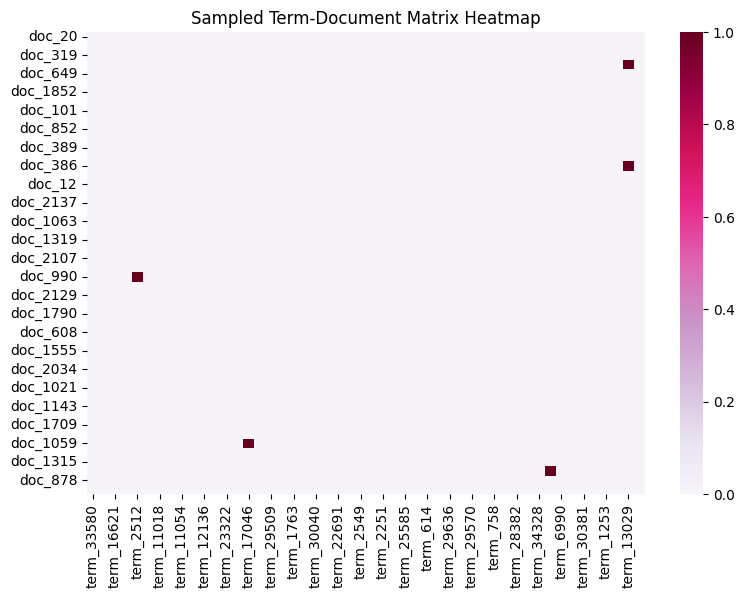

In [14]:
import seaborn as sns

num_samples = 50
sample_rows = np.random.choice(X_counts.shape[0], num_samples, replace=False)
sample_cols = np.random.choice(X_counts.shape[1], num_samples, replace=False)

# Extract the corresponding submatrix from the matrix
plot_z = X_counts[sample_rows, :][:, sample_cols].toarray()

# Generate labels for the selected rows and columns
plot_x = ["term_" + str(i) for i in sample_cols]
plot_y = ["doc_" + str(i) for i in sample_rows]

# Create DataFrame
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

# Plot the heatmap
plt.subplots(figsize=(9, 6))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=False)
plt.title("Sampled Term-Document Matrix Heatmap")
plt.show()

### **>>> Exercise 12 (take home):** 

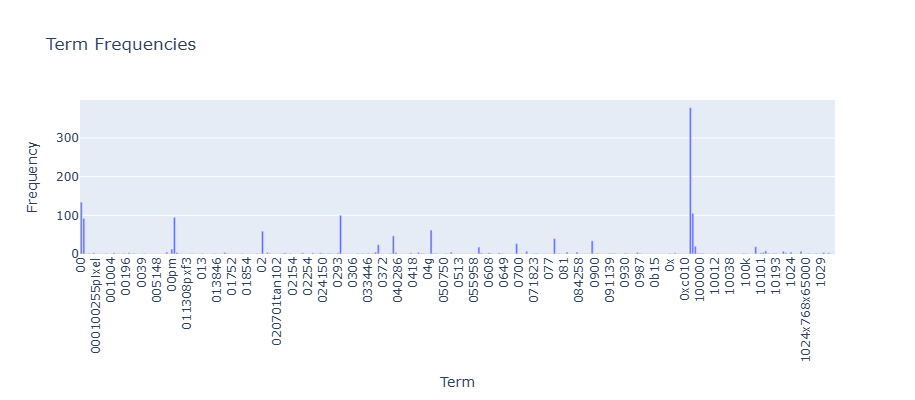

In [15]:
import plotly.express as px

term_frequencies = []
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0]

# Create a DataFrame to store terms and their frequencies
df = pd.DataFrame({
    'Term': count_vect.get_feature_names_out()[:300],
    'Frequency': term_frequencies[:300]
})

# Create a bar chart using Plotly Express
fig = px.bar(df, x='Term', y='Frequency', title='Term Frequencies')

# Set x-axis label rotation
fig.update_layout(xaxis_tickangle=-90, width=1200, height=400)

# Display the interactive chart
fig.show()


### **>>> Exercise 13 (take home):** 

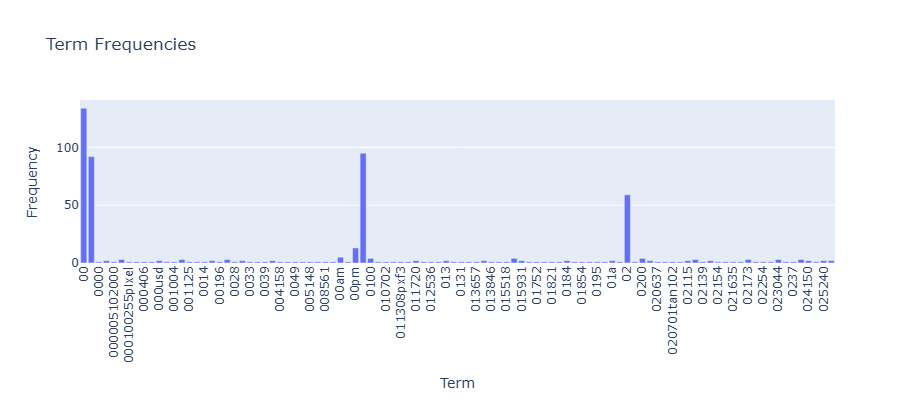

In [16]:
import plotly.express as px

# Create a DataFrame to store terms and their frequencies
df = pd.DataFrame({
    'Term': count_vect.get_feature_names_out()[:100],
    'Frequency': term_frequencies[:100]
})

# Create a bar chart using Plotly Express
fig = px.bar(df, x='Term', y='Frequency', title='Term Frequencies')

# Set x-axis label rotation
fig.update_layout(xaxis_tickangle=-90, width=1200, height=400)

# Display the interactive chart
fig.show()

### **>>> Exercise 14 (take home):** 

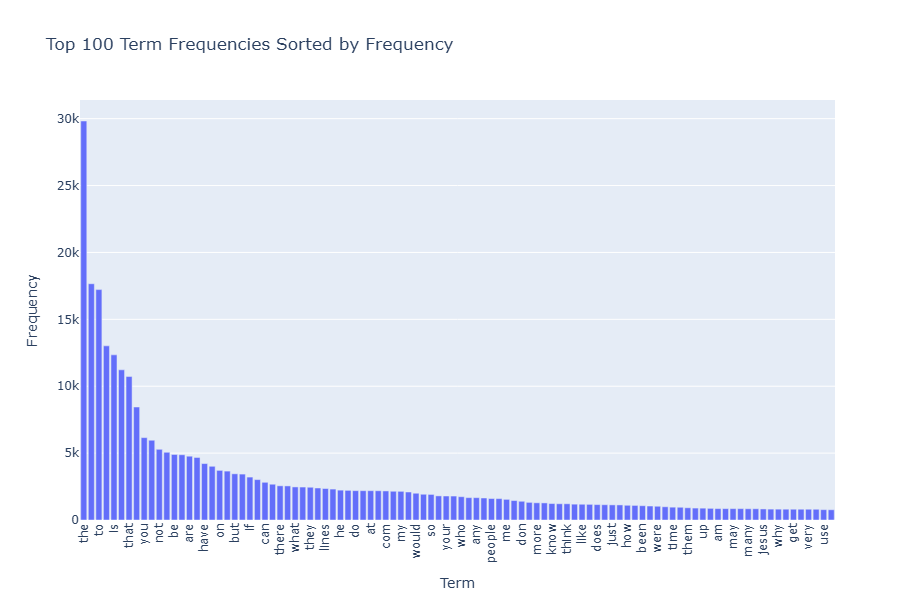

In [17]:
import plotly.express as px

# Create a DataFrame containing terms and their frequencies
df = pd.DataFrame({
    'Term': count_vect.get_feature_names_out(),
    'Frequency': term_frequencies
})

# Sort terms by frequency
df_sorted = df.sort_values(by='Frequency', ascending=False)

# Select the top 100 terms to display
df_top = df_sorted.head(100)

# Plot a bar chart using Plotly
fig = px.bar(df_top, x='Term', y='Frequency', title='Top 100 Term Frequencies Sorted by Frequency')

# Set x-axis label rotation
fig.update_layout(xaxis_tickangle=-90, width=1200, height=600)

# Display the interactive chart
fig.show()

### **>>> Exercise 15 (take home):** 

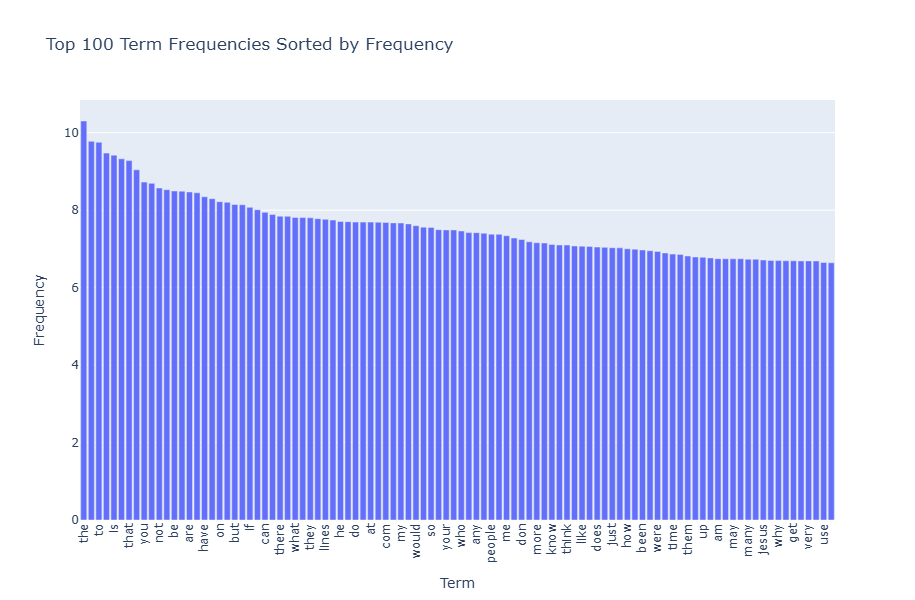

In [18]:
import plotly.express as px
import math

# Create a DataFrame containing terms and their frequencies
df = pd.DataFrame({
    'Term': count_vect.get_feature_names_out(),
    'Frequency': term_frequencies
})

# Calculate the logarithm of each term frequency
term_frequencies_log = [math.log(i) for i in term_frequencies]

# Create a DataFrame with terms and their log-transformed frequencies
df = pd.DataFrame({
    'Term': count_vect.get_feature_names_out(),
    'Frequency': term_frequencies_log
})

# Sort terms by frequency
df_sorted = df.sort_values(by='Frequency', ascending=False)

# Select the top 100 terms to display
df_top = df_sorted.head(100)

# Plot a bar chart using Plotly
fig = px.bar(df_top, x='Term', y='Frequency', title='Top 100 Term Frequencies Sorted by Frequency')

# Set x-axis label rotation
fig.update_layout(xaxis_tickangle=-90, width=1200, height=600)

# Display the interactive chart
fig.show()

### **>>> Exercise 16 (take home):** 

The results:

Category comp.graphics

000	000005102000	000100255pixel	0007	000usd	0010580b	002	0094	00index	00pm

584 rows × 8391 columns

soc.religion.christian

000	0001	01580	02173	0349	0358	04	0510	0511	06

599 rows × 9002 columns

sci.med

0000001200	001642	003258u19250	004021809	00am	01	013	0138	02	02115

594 rows × 11221 columns

alt.atheism

00	0100	015931	020504	023044	024150	025924	033446	04	041343	

480 rows × 8787 columns

The similarities:

Numeric and Alphanumeric Words, Zeros, and High Representation of Stop Words

The differences:

Category-Specific Tokens, Number of Columns (Distinct Terms), and Nature of Terms

### **>>> Exercise 17 (take home):** 

In [19]:
from PAMI.frequentPattern.topk import FAE as alg
from PAMI.frequentPattern.maximal import MaxFPGrowth as maxfp

for k in [500, 1000, 1500]:
    # Initialize the FAE algorithm object with input file and k value
    obj = alg.FAE(iFile='td_freq_db_comp_graphics.csv', k=k)
    # Execute the mining process to find top-k frequent patterns
    obj.mine()
    # Retrieve the mined patterns
    topKFrequentPatterns = obj.getPatterns()
    print('Total No of patterns: ' + str(len(topKFrequentPatterns)))
    print('Runtime: ' + str(obj.getRuntime()))
    obj.save(f'fae_{k}_patterns.txt')

for minSup in [3, 6, 9]:
     # Initialize the MaxFPGrowth object with input file and minSup value
    obj2 = maxfp.MaxFPGrowth("td_freq_db_comp_graphics.csv", minSup=minSup)
    # Execute the mining process to find maximal frequent patterns
    obj2.mine()
    # Retrieve the mined patterns
    patterns_df = obj2.getPatterns()
    print('Total No of patterns: ' + str(len(patterns_df)))
    print('Runtime: ' + str(obj2.getRuntime()))
    obj2.save(f'maxfp_{minSup}_patterns.txt')

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 500
Runtime: 0.4629838466644287
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 1000
Runtime: 0.9960718154907227
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 1500
Runtime: 2.175781726837158
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 6872
Runtime: 11.252931118011475
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 1340
Runtime: 0.14388680458068848
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 660
Runtime: 0.14609670639038086


### **>>> Exercise 18 (take home):** 

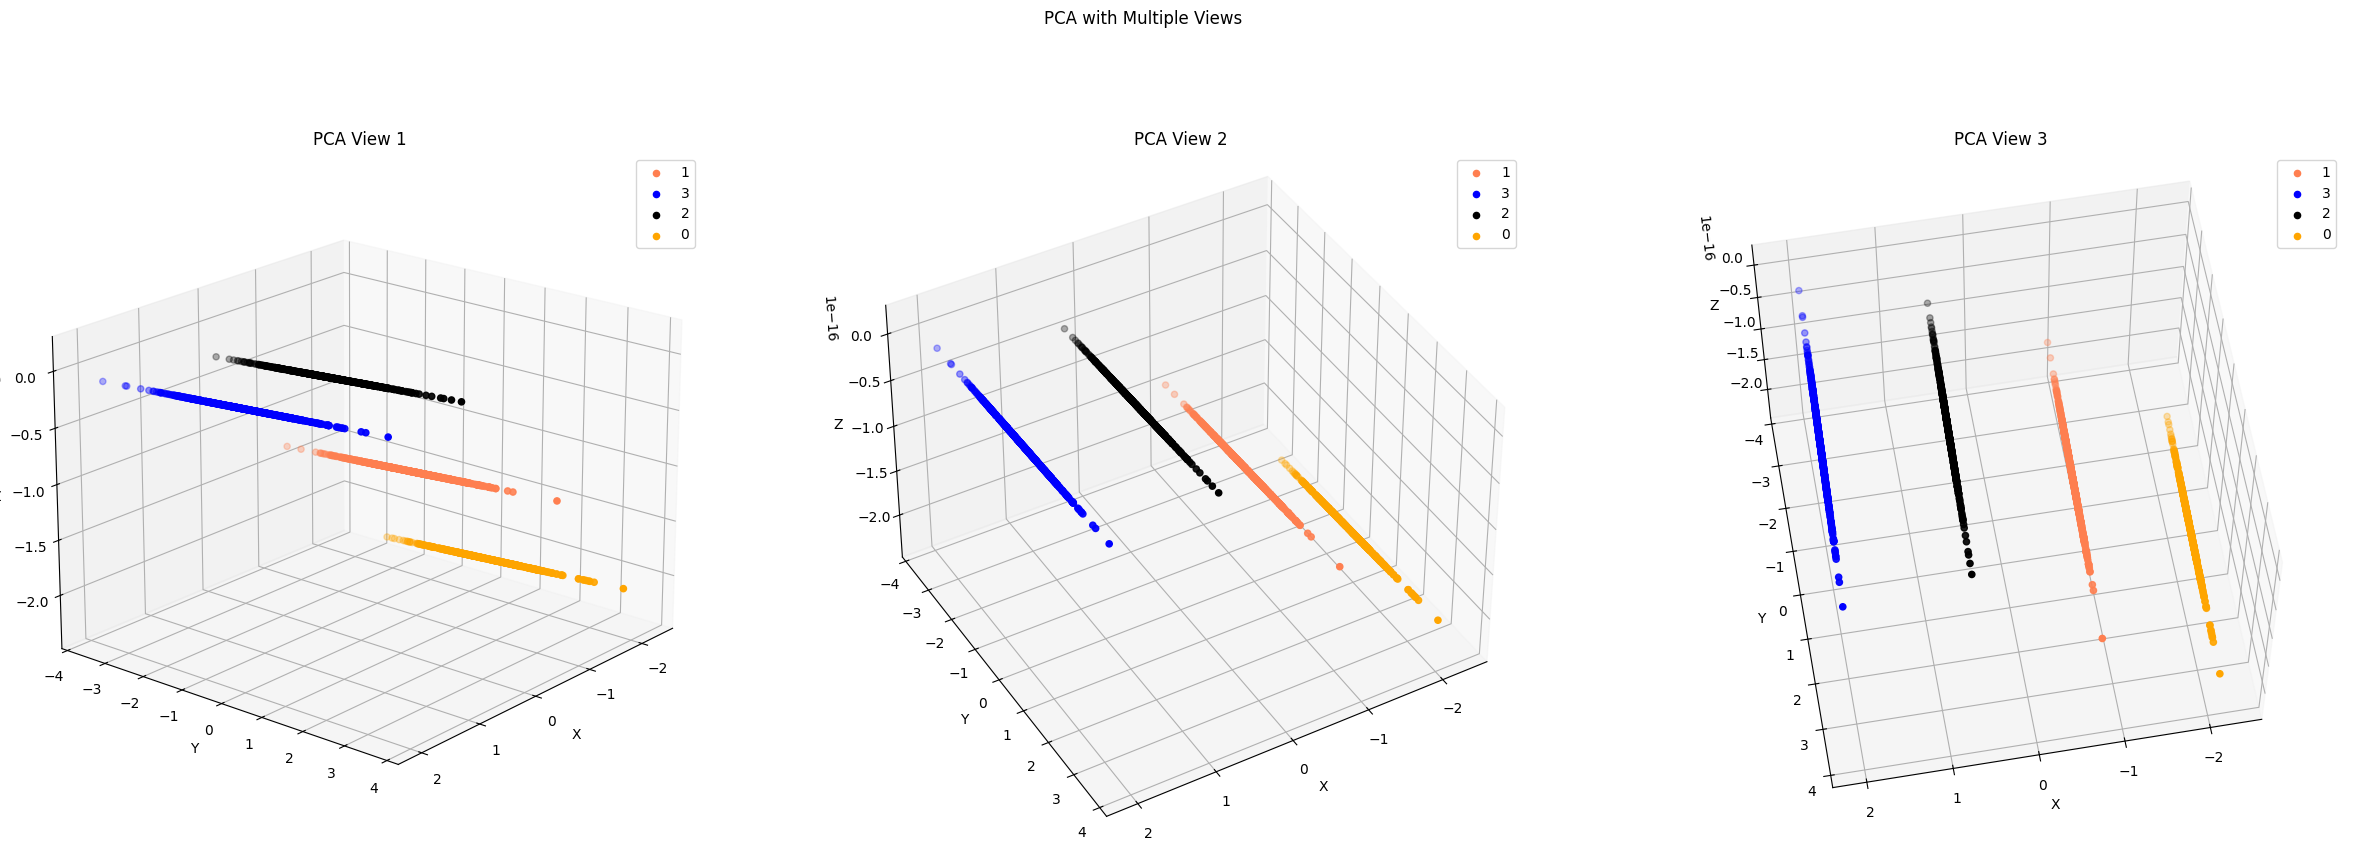

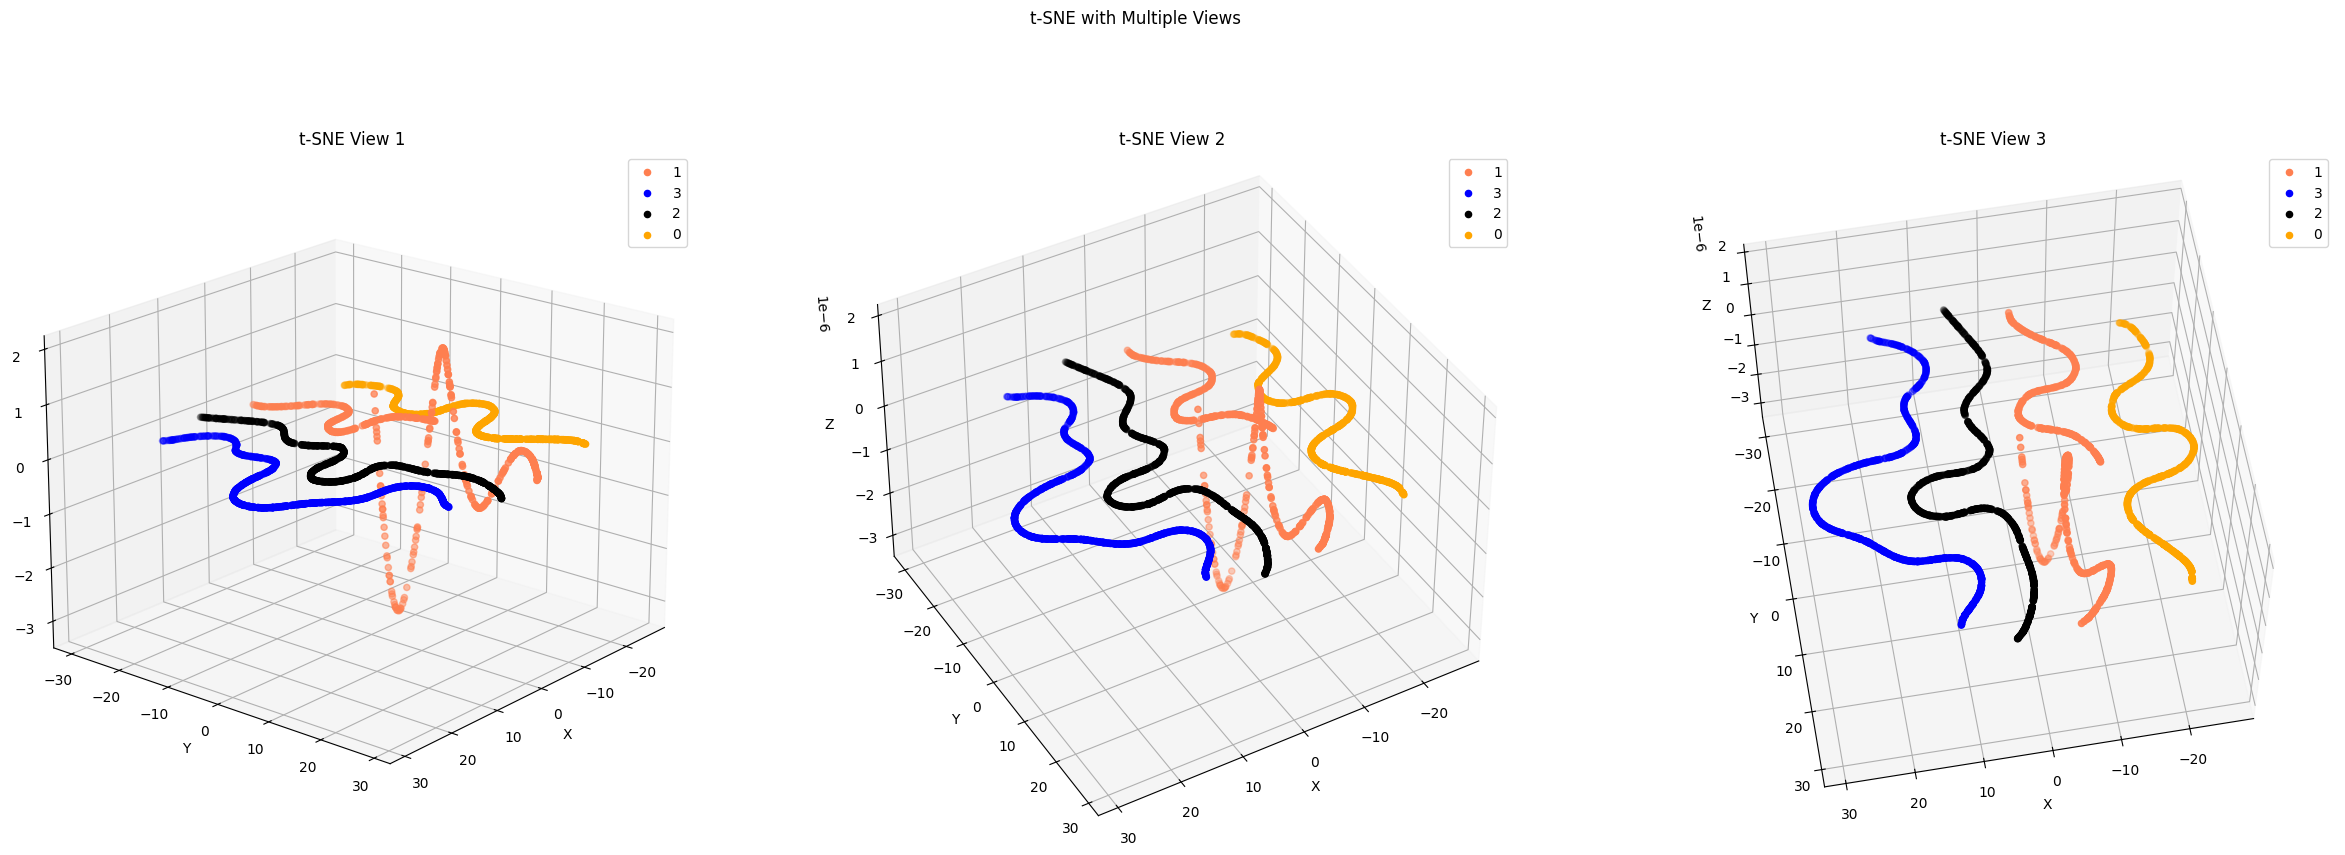

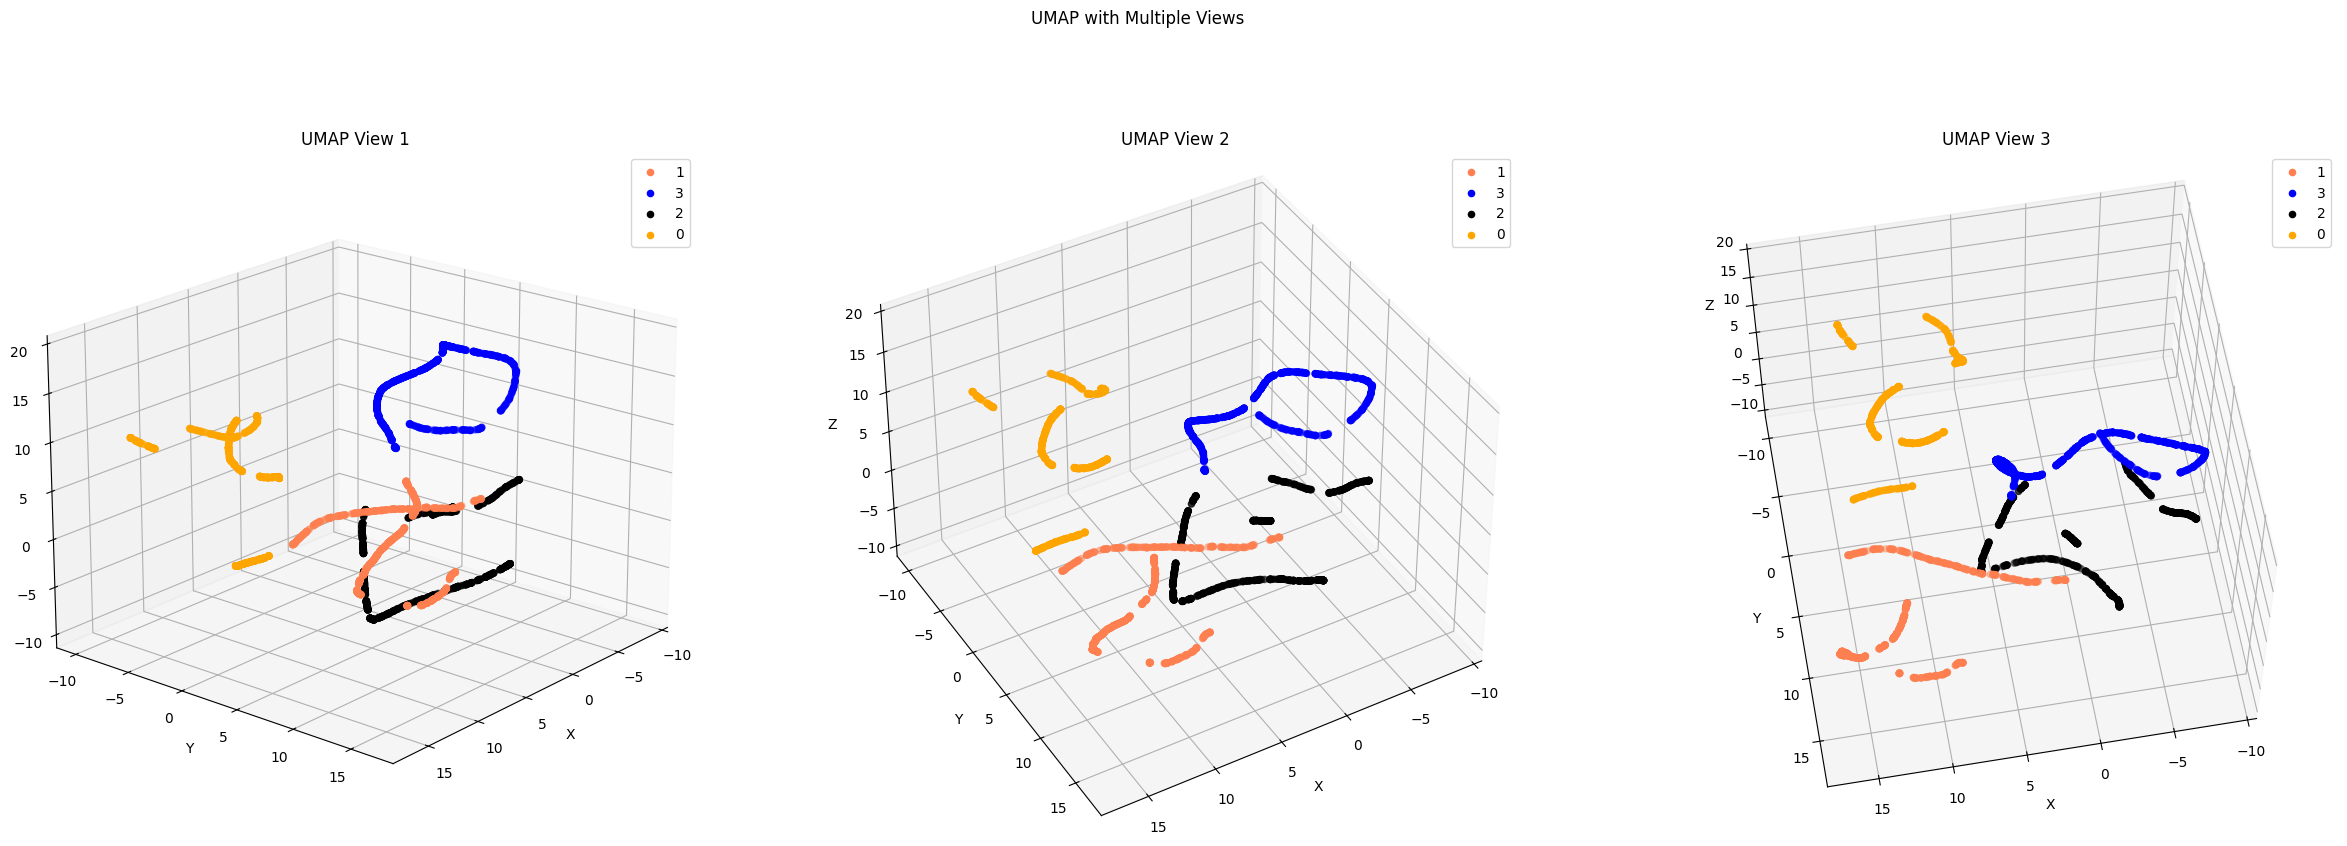

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Sample data preparation
X['category_name'] = LabelEncoder().fit_transform(X['category_name'])
X_numeric = X.select_dtypes(include=[float, int])
X_numeric['random_noise'] = np.random.normal(size=X_numeric.shape[0])

col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()
angles = [(20, 40), (40, 60), (60, 80)]  # Different view angles

# Applying PCA, t-SNE, and UMAP to reduce data to 3D
X_pca_aug = PCA(n_components=3).fit_transform(X_numeric.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(X_numeric.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(X_numeric.values)

# Define a function to create 3D scatter plots with multiple views
def plot_3d_scatter_multiple_views(X_reduced, title):
    fig = plt.figure(figsize=(30, 10))
    fig.suptitle(f'{title} with Multiple Views')
    
    for i, angle in enumerate(angles):
        ax = fig.add_subplot(1, 3, i+1, projection='3d')
        for c, category in zip(col, categories):
            mask = (X['category_name'] == category)
            xs, ys, zs = X_reduced[mask].T
            ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
        
        ax.view_init(elev=angle[0], azim=angle[1])
        ax.set_title(f'{title} View {i+1}')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.legend(loc='upper right')

# Create 3D scatter plots for PCA, t-SNE, and UMAP with multiple views
plot_3d_scatter_multiple_views(X_pca_aug, 'PCA')
plot_3d_scatter_multiple_views(X_tsne_aug, 't-SNE')
plot_3d_scatter_multiple_views(X_umap_aug, 'UMAP')

plt.show()


### **>>> Exercise 19 (take home):** 

In [34]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]
#it dosen't work,the list show the[0000].I think the category_name can't indicate the size of the number of categories. 

text  category  category_name  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1              1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1              1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3              3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3              3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3              3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3              3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3              3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2              2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2              2   

   bin_category  
0  [0, 1, 0, 0]  
1  [0, 1, 0, 0]  
2  [0, 0, 0, 1]  
3  [0, 0, 0, 1]  
4  [0, 0, 0, 1]  
5  [0, 0, 0, 1]  
6  [0, 0, 0, 1]  
7  [0, 0, 1, 0]  
8  [0, 0, 1, 0]

## **Part2- The new dataset**

### 1. Data Preparation

In [35]:
df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
categories =['sentiment, comment']
df = df.sample(frac=1, random_state=42)  # Shuffle the data with a fixed random state

In [36]:
from datasets import load_dataset

# Load the dataset from Hugging Face
ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")

# Convert the 'train' split of the dataset to a DataFrame format
df = ds['train'].to_pandas()

# Display the first few rows of the dataset
print(df.head(10))

# Get the total number of rows in the dataset
len(df)

       sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...
5      nostalgia  Every time I heard this song as a child, I use...
6      nostalgia  My dad loved listening to Jim Reeves, when I w...
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...
8  not nostalgia           Wherever you  are you always in my heart
9  not nostalgia  Elvis will always be number one no one can com...


1500

In [37]:
# Load the dataset from Hugging Face and convert it to a DataFrame
dataset = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")
df = dataset['train'].to_pandas()  # Convert the training set to DataFrame format

# Split the text in the 'comment' column
df['comment_split'] = df['comment'].apply(lambda x: x.split())

# Print the first 10 rows of the 'comment' column, with each comment split by line breaks
for i in range(10):  # Print the first 10 rows
    print("\n".join(df['comment'].iloc[i].split("\n")))
    print("---")

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
---
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel
---
I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.
---
30 day leave from 1st tour in Viet Nam to convince my Mary Lou to "marry me" when I came back from my 2nd tour.  Now, 47 years later this December God granted the greatest blessing a man can receiv

### 2. Data Transformation

In [38]:
from nltk.corpus import stopwords
import string

def format_rows(docs):
    """Format the text field and remove special characters"""
    D = []
    for d in docs:  # Iterate directly over docs
        temp_d = " ".join(d.split("\n")).strip('\n\t').translate(str.maketrans('', '', string.punctuation)).lower()
        D.append([temp_d])  # Add the processed text to list D
    return D

# Apply formatting and convert to DataFrame
X = pd.DataFrame.from_records(format_rows(df['comment']), columns=['comment'])

print("Formatted DataFrame:")
print(X)
X[0:2]


Formatted DataFrame:
                                                comment
0     he was a singer with a golden voice that i lov...
1     the mist beautiful voice ever i listened to hi...
2     i have most of mr reeves songs  always love hi...
3     30 day leave from 1st tour in viet nam to conv...
4     listening to his songs reminds me of my mum wh...
...                                                 ...
1495  i dont knowbut the opening of the videoseeing ...
1496  its sad this is such a beautiful song when you...
1497  dear friend i think age and time is not that i...
1498  i was born in 1954 and started to be aware of ...
1499  this is the first cd i bought after my marriag...

[1500 rows x 1 columns]


comment
0  he was a singer with a golden voice that i lov...
1  the mist beautiful voice ever i listened to hi...

In [39]:
X = pd.DataFrame({'sentiment': ["not nostalgia", "nostalgia"]})

X = pd.DataFrame({'sentiment': df['sentiment'], 'comment': df['comment']})

# Define the target_names dictionary
target_names = {
    "nostalgia": "yes",
    "not nostalgia": "not"
}

# Update the dmh.format_labels function to accept target_names as a parameter
X['nostalgia'] = X['sentiment'].apply(lambda t: target_names.get(t, "Unknown"))

# Display the result
print("Transformed DataFrame:")
print(X)

Transformed DataFrame:
          sentiment                                            comment  \
0     not nostalgia  He was a singer with a golden voice that I lov...   
1         nostalgia  The mist beautiful voice ever I listened to hi...   
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4         nostalgia  listening to his songs reminds me of my mum wh...   
...             ...                                                ...   
1495  not nostalgia  i don't know!..but the opening of the video,.....   
1496  not nostalgia  it's sad this is such a beautiful song when yo...   
1497  not nostalgia  Dear Friend, I think age and time is not that ...   
1498      nostalgia  I was born in 1954 and started to be aware of ...   
1499      nostalgia  This is the first CD I bought after my marriag...   

     nostalgia  
0          not  
1          yes  
2          yes  
3          not  
4  

In [40]:
X[0:10]

sentiment                                            comment nostalgia
0  not nostalgia  He was a singer with a golden voice that I lov...       not
1      nostalgia  The mist beautiful voice ever I listened to hi...       yes
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...       yes
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...       not
4      nostalgia  listening to his songs reminds me of my mum wh...       yes
5      nostalgia  Every time I heard this song as a child, I use...       yes
6      nostalgia  My dad loved listening to Jim Reeves, when I w...       yes
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...       yes
8  not nostalgia           Wherever you  are you always in my heart       not
9  not nostalgia  Elvis will always be number one no one can com...       not

In [41]:
#query the last 10 records
X[-10:]

sentiment                                            comment  \
1490  not nostalgia  He really isn't my cup of tea, but some of his...   
1491      nostalgia  real music...how i miss those days...brings ba...   
1492      nostalgia  i used to cry over this song cause i had a boy...   
1493  not nostalgia  He really has that "love you like a brother" l...   
1494  not nostalgia  That's funny. But Leo really is a nice guy. He...   
1495  not nostalgia  i don't know!..but the opening of the video,.....   
1496  not nostalgia  it's sad this is such a beautiful song when yo...   
1497  not nostalgia  Dear Friend, I think age and time is not that ...   
1498      nostalgia  I was born in 1954 and started to be aware of ...   
1499      nostalgia  This is the first CD I bought after my marriag...   

     nostalgia  
1490       not  
1491       yes  
1492       yes  
1493       not  
1494       not  
1495       not  
1496       not  
1497       not  
1498       yes  
1499       yes

In [42]:
X.loc[:10,'comment']

0     He was a singer with a golden voice that I lov...
1     The mist beautiful voice ever I listened to hi...
2     I have most of Mr. Reeves songs.  Always love ...
3     30 day leave from 1st tour in Viet Nam to conv...
4     listening to his songs reminds me of my mum wh...
5     Every time I heard this song as a child, I use...
6     My dad loved listening to Jim Reeves, when I w...
7     i HAVE ALSO LISTENED TO Jim Reeves since child...
8              Wherever you  are you always in my heart
9     Elvis will always be number one no one can com...
10    ill bet if they begin to play this song on the...
Name: comment, dtype: object

In [43]:
X.iloc[:10, 1]

0    He was a singer with a golden voice that I lov...
1    The mist beautiful voice ever I listened to hi...
2    I have most of Mr. Reeves songs.  Always love ...
3    30 day leave from 1st tour in Viet Nam to conv...
4    listening to his songs reminds me of my mum wh...
5    Every time I heard this song as a child, I use...
6    My dad loved listening to Jim Reeves, when I w...
7    i HAVE ALSO LISTENED TO Jim Reeves since child...
8             Wherever you  are you always in my heart
9    Elvis will always be number one no one can com...
Name: comment, dtype: object

In [44]:
print(X[X['sentiment']=='nostalgia'].iloc[::10][0:5])

    sentiment                                            comment nostalgia
1   nostalgia  The mist beautiful voice ever I listened to hi...       yes
18  nostalgia  My Grandparents had a pub in the 1970's, this ...       yes
32  nostalgia  I remember my Mom listening to Jim over and ov...       yes
50  nostalgia  If I remember correctly, this song came out af...       yes
71  nostalgia  Gosh does this bring back memories. Nearly eve...       yes


### 3. Data Mining using Pandas

In [45]:
X.isnull()

sentiment  comment  nostalgia
0         False    False      False
1         False    False      False
2         False    False      False
3         False    False      False
4         False    False      False
...         ...      ...        ...
1495      False    False      False
1496      False    False      False
1497      False    False      False
1498      False    False      False
1499      False    False      False

[1500 rows x 3 columns]

In [46]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                            nostalgia  
0  The amoung of missing records is:   
1                                   0

In [47]:
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

In [48]:
dummy_series = pd.Series(["dummy_record", 1], index=["sentiment", "comment"])
dummy_series

sentiment    dummy_record
comment                 1
dtype: object

In [49]:
dummy_series.to_frame().T

sentiment comment
0  dummy_record       1

In [50]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)
len(result_with_series)

1501

In [51]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                            nostalgia  
0  The amoung of missing records is:   
1                                   1

In [52]:
X.dropna(inplace=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))
len(X)

1500

In [53]:
NA_df['missing_example'].isnull()

0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

#### 3.1 Dealing with Duplicate Data

In [54]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [55]:
sum(X.duplicated('comment'))

1

In [56]:
X.drop_duplicates(keep=False, inplace=True)
len(X)

1498

### 4. Data Preprocessing

In [57]:
X_sample = X.sample(n=1000)
len(X_sample)

1000

In [58]:
X_sample[0:4]

sentiment                                            comment  \
86    not nostalgia  Probably one of the most dramatic and powerful...   
202   not nostalgia  I think he's his most comfortable with this lo...   
871       nostalgia  i was 3 and my Aunts play the record and song ...   
1334      nostalgia  Thank you. I feel nostalgic for this music ver...   

     nostalgia  
86         not  
202        not  
871        yes  
1334       yes

In [59]:
import matplotlib.pyplot as plt 
%matplotlib inline
df

sentiment                                            comment  \
0     not nostalgia  He was a singer with a golden voice that I lov...   
1         nostalgia  The mist beautiful voice ever I listened to hi...   
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4         nostalgia  listening to his songs reminds me of my mum wh...   
...             ...                                                ...   
1495  not nostalgia  i don't know!..but the opening of the video,.....   
1496  not nostalgia  it's sad this is such a beautiful song when yo...   
1497  not nostalgia  Dear Friend, I think age and time is not that ...   
1498      nostalgia  I was born in 1954 and started to be aware of ...   
1499      nostalgia  This is the first CD I bought after my marriag...   

                                          comment_split  
0     [He, was, a, singer, with, a, golden, voice, t...  
1     [The, mist, beautiful, voice, ever, I, listene...  
2     [I, have, most, of, Mr., Reeves, songs., Alway...  
3     [30, day, leave, from, 1st, tour, in, Viet, Na...  
4     [listening, to, his, songs, reminds, me, of, m...  
...                                                 ...  
1495  [i, don't, know!..but, the, opening, of, the, ...  
1496  [it's, sad, this, is, such, a, beautiful, song...  
1497  [Dear, Friend,, I, think, age, and, time, is, ...  
1498  [I, was, born, in, 1954, and, started, to, be,...  
1499  [This, is, the, first, CD, I, bought, after, m...  

[1500 rows x 3 columns]

nostalgia
yes    750
not    748
Name: count, dtype: int64


<Axes: title={'center': 'sentiment distribution'}, xlabel='nostalgia'>

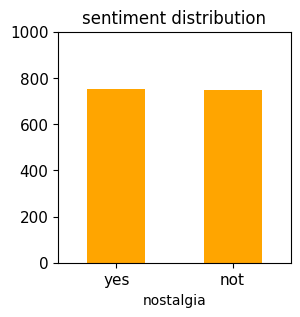

In [60]:
print(X.nostalgia.value_counts())
# plot barchart for X
X.nostalgia.value_counts().plot(kind = 'bar',
                                    title = 'sentiment distribution',
                                    ylim = [0, 1000],       
                                    rot =0, fontsize = 11, figsize = (3,3),color=['orange'])

nostalgia
not    508
yes    492
Name: count, dtype: int64


<Axes: title={'center': 'sentiment distribution'}, xlabel='nostalgia'>

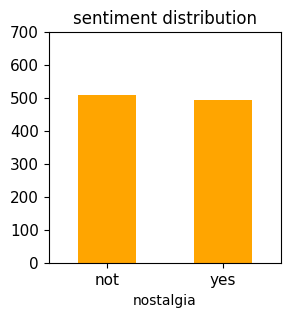

In [61]:
print(X_sample.nostalgia.value_counts())
# plot barchart for X
X_sample.nostalgia.value_counts().plot(kind = 'bar',
                                    title = 'sentiment distribution',
                                    ylim = [0, 700],       
                                    rot =0, fontsize = 11, figsize = (3,3),color=['orange'])

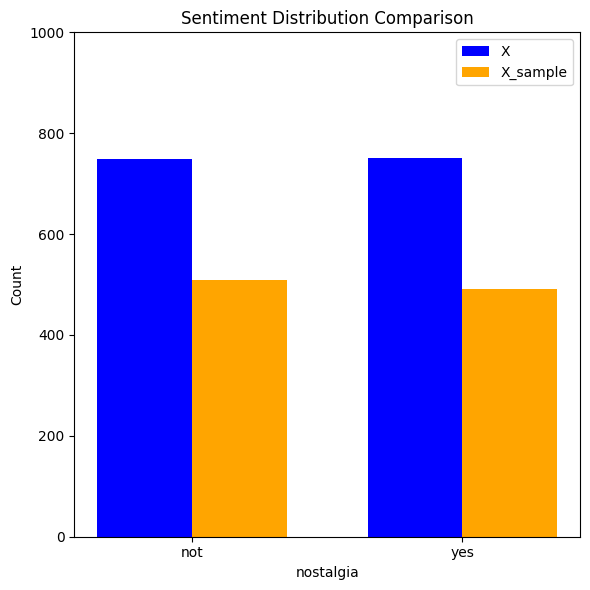

In [62]:
# Get data
X_sample_counts = X_sample.nostalgia.value_counts()
X_counts = X.nostalgia.value_counts()

# Ensure both datasets have the same category index
nostalgia = X_sample_counts.index.union(X_counts.index)  # Merge categories from both datasets

X_sample_counts = X_sample_counts.reindex(nostalgia, fill_value=0)
X_counts = X_counts.reindex(nostalgia, fill_value=0)

# Set bar width and positions
bar_width = 0.35
index = np.arange(len(nostalgia))  # Create x-axis indices

# Create the chart
plt.figure(figsize=(6, 6))
plt.bar(index, X_counts, bar_width, label='X', color='blue')  # First bar
plt.bar(index + bar_width, X_sample_counts, bar_width, label='X_sample', color='orange')  # Second bar, offset in position

# Add labels and title
plt.xlabel('nostalgia')
plt.ylabel('Count')
plt.title('Sentiment Distribution Comparison')
plt.xticks(index + bar_width / 2, nostalgia, rotation=0, fontsize=10)  # Set x-axis tick positions and labels
plt.ylim(0, 1000)  # Set y-axis range
plt.legend()

# Adjust layout and display the chart
plt.tight_layout()
plt.show()


#### 4.1 Feature Creation

In [63]:
from nltk.tokenize import word_tokenize
# Run tokenization
X = pd.DataFrame({'sentiment': df['sentiment'], 'comment': df['comment']})

def custom_tokenize_text(text):
    # Use word_tokenize to split the text into a list of words
    return word_tokenize(text)

# Apply the custom tokenization function to the 'comment' column
X['unigrams'] = X['comment'].apply(custom_tokenize_text)

# Display the first 4 rows of the 'unigrams' column
X[0:4]["unigrams"]
print(X['unigrams'].head(4))


0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object


In [64]:
list(X[0:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

#### 4.2 Feature subset selection

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (np.int32(0), np.int32(1598))	1
  (np.int32(0), np.int32(3570))	2
  (np.int32(0), np.int32(2973))	1
  (np.int32(0), np.int32(3650))	1
  (np.int32(0), np.int32(1470))	1
  (np.int32(0), np.int32(3534))	1
  (np.int32(0), np.int32(3282))	1
  (np.int32(0), np.int32(2028))	1
  (np.int32(0), np.int32(3336))	1
  (np.int32(0), np.int32(1606))	1
  (np.int32(0), np.int32(233))	2
  (np.int32(0), np.int32(3284))	3
  (np.int32(0), np.int32(3328))	2
  (np.int32(0), np.int32(1651))	2
  (np.int32(0), np.int32(1512))	1
  (np.int32(0), np.int32(1249))	1
  (np.int32(0), np.int32(323))	1
  (np.int32(0), np.int32(214))	1
  (np.int32(0), np.int32(2341))	1
  (np.int32(0), np.int32(15))	1
  (np.int32(0), np.int32(1733))	1
  (np.int32(0), np.int32(3304))	1
  (np.int32(0), np.int32(907))	1
  (np.int32(0), np.int32(258))	2
  (np.int32(0), np.int32(3124))	1
  (np.int32(0), np.int32(2328))	2
  (np.int32(0), np.int32(245))	1
  (np.int32(0), np.int32(3581))	1
  (np.int32(0), np.int32(1591))	1
  (np.int32(0), np.int

In [66]:
count_vect.get_feature_names_out()[878]

'dad'

In [67]:
analyze = count_vect.build_analyzer()
analyze(X.comment[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [68]:
X_counts.shape

(1500, 3730)

In [69]:
count_vect.get_feature_names_out(df)[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [70]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [71]:
count_vect.get_feature_names_out(df)[0:1]

array(['00'], dtype=object)

In [72]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

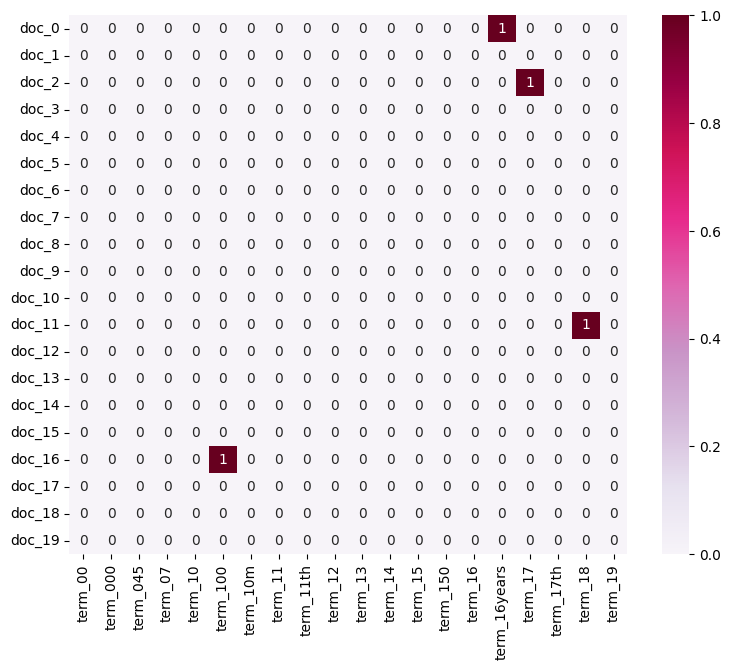

In [73]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

#### 4.3 Attribute Transformation / Aggregation

In [74]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0]

np.int64(1)

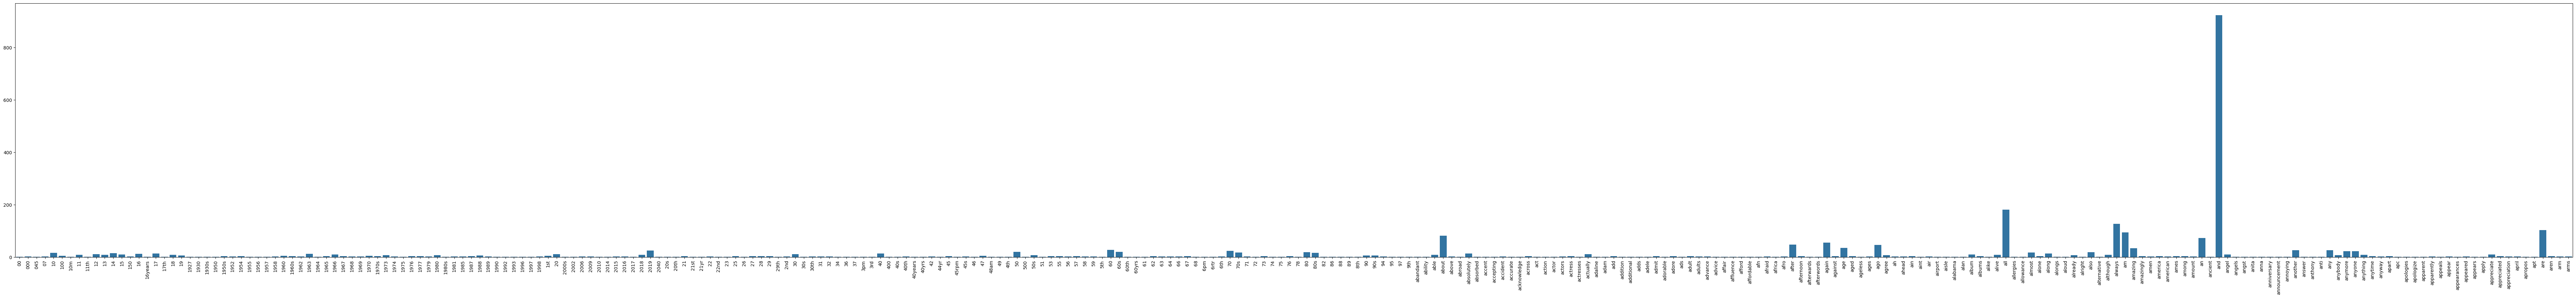

In [75]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Set up the plot with a fixed figure size
plt.subplots(figsize=(100, 10))
g = sns.barplot(
    x=count_vect.get_feature_names_out()[:300], 
    y=term_frequencies[:300]
)

# Set the x-axis ticks and tick labels explicitly to avoid the warning
g.set_xticks(range(300))  # Set a fixed number of ticks matching the labels
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation=90)

# Alternatively, using FixedLocator:
g.xaxis.set_major_locator(ticker.FixedLocator(range(300)))
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation=90)

plt.show()


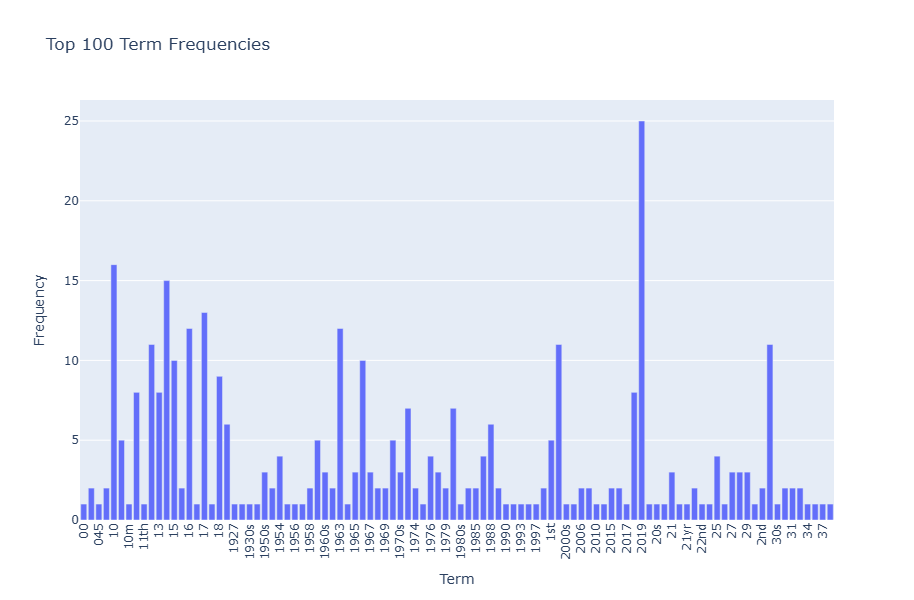

In [76]:
import plotly.express as px
import pandas as pd

# Create a DataFrame to store terms and their frequencies
df = pd.DataFrame({
    'Term': count_vect.get_feature_names_out()[:100],
    'Frequency': term_frequencies[:100]
})

# Create a bar chart using Plotly Express
fig = px.bar(df, x='Term', y='Frequency', title='Top 100 Term Frequencies')

# Set the rotation angle for x-axis labels
fig.update_layout(xaxis_tickangle=-90, width=1200, height=600)

# Display the interactive chart
fig.show()


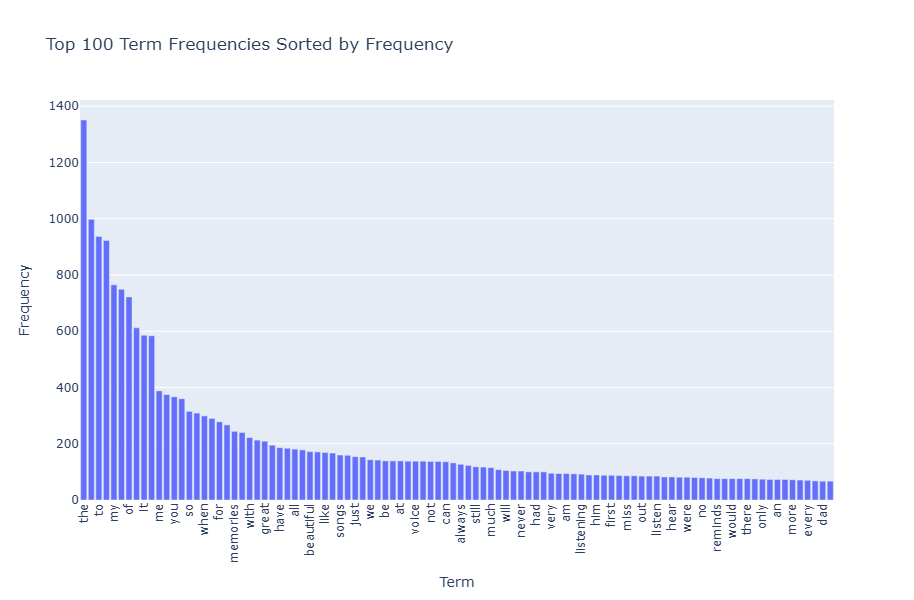

In [77]:
import plotly.express as px
import pandas as pd

# Create a DataFrame containing terms and their frequencies
df = pd.DataFrame({
    'Term': count_vect.get_feature_names_out(),
    'Frequency': term_frequencies
})

# Sort terms by frequency
df_sorted = df.sort_values(by='Frequency', ascending=False)

# Select the top 100 terms for display
df_top = df_sorted.head(100)

# Create a bar chart using Plotly
fig = px.bar(df_top, x='Term', y='Frequency', title='Top 100 Term Frequencies Sorted by Frequency')

# Set the rotation angle for x-axis labels
fig.update_layout(xaxis_tickangle=-90, width=1200, height=600)

# Display the interactive chart
fig.show()


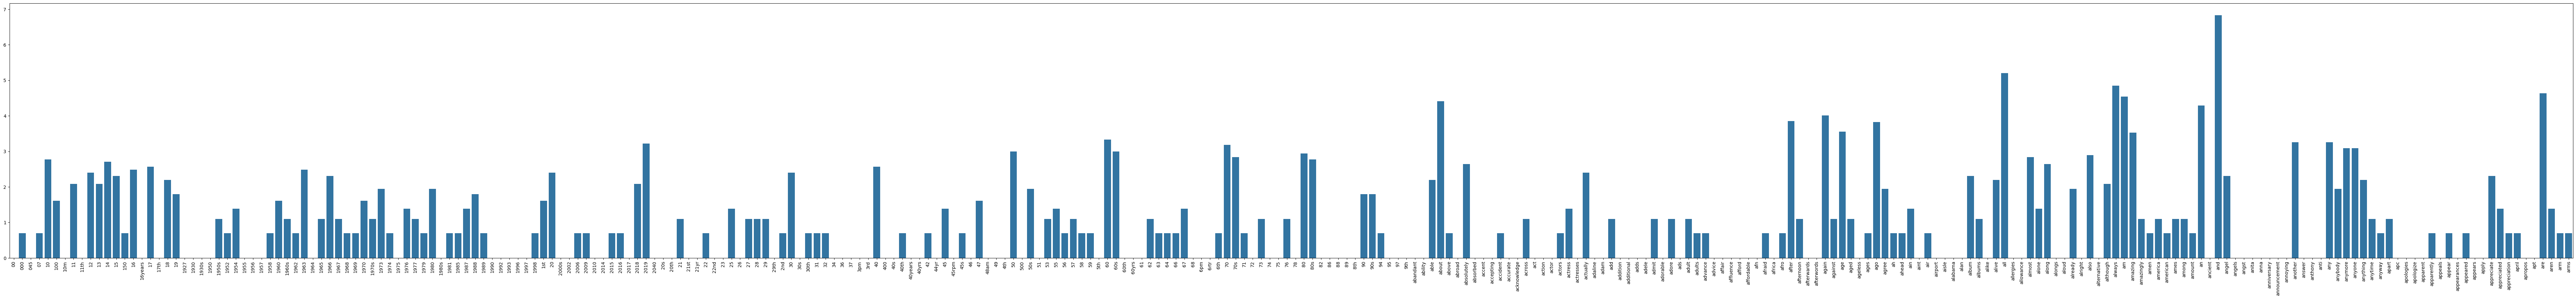

In [78]:
import math
from matplotlib.ticker import FixedLocator

# Calculate the log of term frequencies
term_frequencies_log = [math.log(i) for i in term_frequencies]

# Create the plot with a large figure size for better readability
plt.subplots(figsize=(100, 10))
g = sns.barplot(
    x=count_vect.get_feature_names_out()[:300],
    y=term_frequencies_log[:300]
)

# Set the x-axis ticks to match the labels
g.xaxis.set_major_locator(FixedLocator(range(300)))  # Fix the tick positions to 0 through 299
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation=90)

plt.show()


In [79]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a separate DataFrame for each sentiment
sentiments = X['sentiment'].unique()
sentiment_dfs = {}  # Dictionary to store each sentiment's DataFrame

# Create an individual DataFrame for each sentiment
for sentiment in sentiments:
    # Filter the data based on sentiment
    sentiment_dfs[sentiment] = X[X['sentiment'] == sentiment].copy()

# Function to create a term-document frequency DataFrame
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform text data into a term-frequency matrix
    
    # Retrieve the list of vocabulary terms
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame with terms as columns and documents as rows
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create a term-document frequency DataFrame for each sentiment
term_document_dfs = {}  # Dictionary to store each sentiment's term-document DataFrame

for sentiment, df in sentiment_dfs.items():
    term_document_dfs[sentiment] = create_term_document_df(df)

# Set pandas display options to avoid line breaks in the output
pd.set_option('display.expand_frame_repr', False)  # Display in a single line
pd.set_option('display.max_colwidth', None)  # Set column width

# Example: Display the term-document matrix for a specific sentiment
for sentiment, term_df in term_document_dfs.items():
    print(f"Term-document matrix for sentiment '{sentiment}':")
    print(term_df)
    print("\n")


Term-document matrix for sentiment 'not nostalgia':
     00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  your  yourself  youth  youtube  yrs  yuo  zealand  zulus
0     0    0    0   0    0    0   0   0   0   0  ...         0           0     0         0      0        0    0    0        0      0
1     0    0    0   0    0    0   0   0   0   0  ...         0           0     0         0      0        0    0    0        0      0
2     0    0    0   0    0    0   0   0   0   0  ...         0           0     0         0      0        0    0    0        0      0
3     0    0    0   0    0    0   0   0   0   0  ...         0           0     0         0      0        0    0    0        0      0
4     0    0    0   0    0    0   0   0   0   0  ...         0           0     0         0      0        0    0    0        0      0
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   ...       ...    ...      ...  ...  ...      ...    ...
745   0    0    0

In [80]:
sentiment_number = 1  # Change this value from 0 to any other number to select a different category

# Retrieve all unique sentiment labels
sentiments = list(term_document_dfs.keys())

# Print the term-document matrix for the selected category
print(f"Filtered Term-Document Frequency DataFrame for '{sentiments[sentiment_number]}':")
print(term_document_dfs[sentiments[sentiment_number]])

Filtered Term-Document Frequency DataFrame for 'nostalgia':
     07  10  11  11th  12  13  14  15  16  17  ...  young  younger  youngster  your  yours  youth  youthful  youtube  yrs  yup
0     0   0   0     0   0   0   0   0   0   0  ...      0        0          0     0      0      0         0        0    0    0
1     0   0   0     0   0   0   0   0   0   1  ...      0        0          0     0      0      0         0        0    0    0
2     0   0   0     0   0   0   0   0   0   0  ...      0        0          0     0      0      0         0        0    0    0
3     0   0   0     0   0   0   0   0   0   0  ...      0        0          0     1      0      0         0        0    0    0
4     0   0   0     0   0   0   0   0   0   0  ...      0        0          0     0      0      0         0        0    0    0
..   ..  ..  ..   ...  ..  ..  ..  ..  ..  ..  ...    ...      ...        ...   ...    ...    ...       ...      ...  ...  ...
745   0   0   0     0   0   0   0   0   0   0  ... 

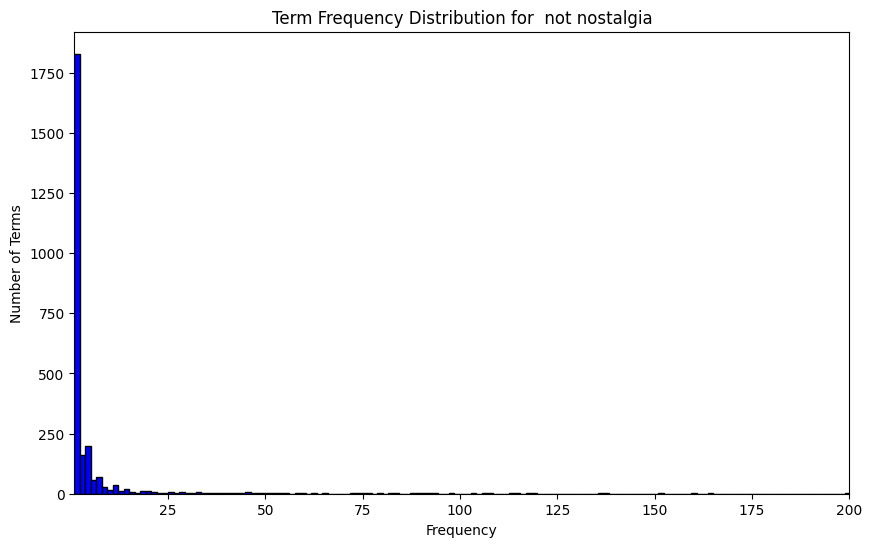

In [81]:
sentiment_number=0 #You can change it from 0 to 1
word_counts = term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=500, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for  {sentiments[sentiment_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [82]:
sentiment_number=0 #You can change it from 0 to 1
word_counts = term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in top_5_percent_indices]

print(f"sentiment: {sentiments[sentiment_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

sentiment: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['16', '15', '1963', '1960s', '1960', '1958', '1955', '1954', '1952', '11', '100', 'quando', 'purchased', 'melodrama', 'melodic', 'melbourne', 'lisa', 'liking', '1970', 'proof', 'pronunciation', 'promise', 'profane', 'prof', 'produced', 'prodigy', '1967', '1966', '1964', '045', 'putting', '17th', '20s', '2018', '2017', '2014', '2009', '2002', '2000s', '20', '1st', '1998', '1996', '1993', '1992', '1990', '1985', '1979', '25', '23', '22nd', 'likes', 'light', 'lifts', 'lift', 'lifetime', 'lies', 'license', 'library', 'levi', 'level', 'lets', 'lest', '20th', 'prime', 'prevalent', 'pretty', 'pretensions', '400', '40', '3pm', '34', '32', '31', '30th', '30s', '30', '2nd', '29th', '28', '50', '4th', '49', '47', '45s', '45rpm', '45', '42', '40yrs', '40years', '40th', 'probably', 'privilege', 'priscilla', 'principle', 'princess', 'prefer', 'predictions', 'predicting', '74', '71', '70s', '6pm', '66', '64', '62', '61', '60th',

In [83]:
sentimen_number=0 #You can change it from 0 to 1
word_counts = term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in bottom_1_percent_indices]

print(f"sentimen: {sentiments[sentiment_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


sentimen: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['16', '15', '1963', '1960s', '1960', '1958', '1955', '1954', '1952', '11', '100', 'quando', 'purchased', 'melodrama', 'melodic', 'melbourne', 'lisa', 'liking', '1970', 'proof', 'pronunciation', 'promise', 'profane', 'prof', 'produced', 'prodigy']


In [84]:
sentiment_number=0#You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
filtered_term_document_dfs = {}

for sentiment in sentiments:
    filtered_term_document_dfs[sentiment] = filter_top_bottom_words_by_sum(term_document_dfs[sentiment])
term_document_dfs=filtered_term_document_dfs
# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for {sentiments[sentiment_number]}:")
filtered_term_document_dfs[sentiments[sentiment_number]]

Filtered Term-Document Frequency DataFrame for not nostalgia:


00  000  045  10  100  11  14  15  150  16  ...  yet  young  younger  youngest  yourself  youth  youtube  yrs  yuo  zealand
0     0    0    0   0    0   0   0   0    0   0  ...    0      0        0         0         0      0        0    0    0        0
1     0    0    0   0    0   0   0   0    0   0  ...    0      0        0         0         0      0        0    0    0        0
2     0    0    0   0    0   0   0   0    0   0  ...    0      0        0         0         0      0        0    0    0        0
3     0    0    0   0    0   0   0   0    0   0  ...    0      0        0         0         0      0        0    0    0        0
4     0    0    0   0    0   0   0   0    0   0  ...    0      0        0         0         0      0        0    0    0        0
..   ..  ...  ...  ..  ...  ..  ..  ..  ...  ..  ...  ...    ...      ...       ...       ...    ...      ...  ...  ...      ...
745   0    0    0   0    0   0   0   0    0   0  ...    0      0        0         0         0      0        0    0    0        0
746   0    0    0   0    0   0   0   0    0   0  ...    0      0        0         0         0      0        0    0    0        0
747   0    0    0   0    0   0   0   0    0   0  ...    0      0        0         0         0      0        0    0    0        0
748   0    0    0   0    0   0   0   0    0   0  ...    0      0        0         0         0      0        0    0    0        0
749   0    0    0   0    0   0   0   0    0   0  ...    0      0        0         0         0      0        0    0    0        0

[750 rows x 2446 columns]

In [85]:
from PAMI.extras.convert._DF2DB import _DenseFormatDF as db  # Import the DF2DB class from the specified module for DataFrame-to-database conversion

# Loop through the dictionary of term-document DataFrames
for sentiment in term_document_dfs:
    # Replace dots with underscores in the sentiment name to avoid errors in the file creation
    sentiment_safe = sentiment.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[sentiment])
    obj.convert2TransactionalDatabase(f'td_freq_db_{sentiment_safe}.csv', '>=', 1)

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.696185286103542
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.20498326251217
Variance in Transaction Sizes : 51.982604800547186
Sparsity : 0.9959721235358483


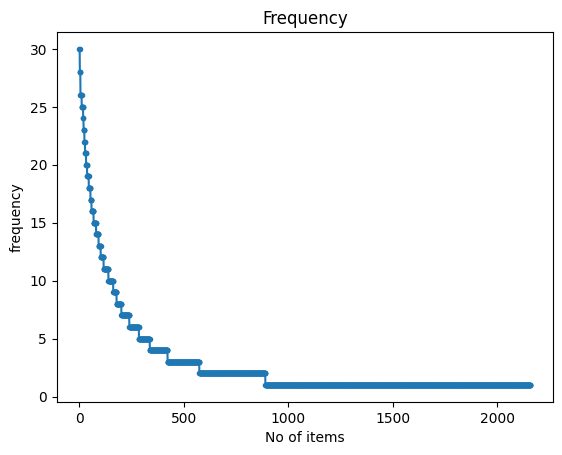

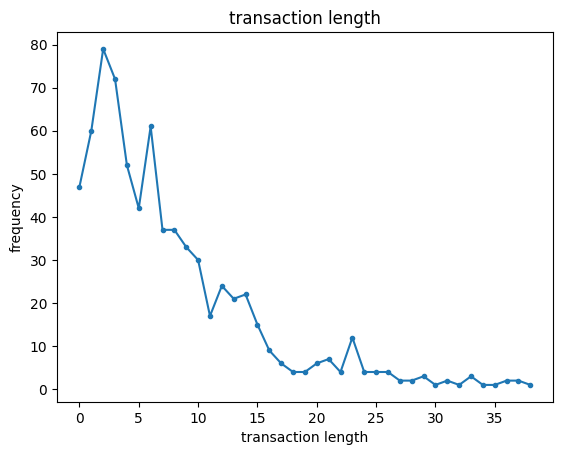

In [86]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 747
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.392235609103079
Maximum Transaction Size : 47
Standard Deviation Transaction Size : 5.938560371491883
Variance in Transaction Sizes : 35.31377341358284
Sparsity : 0.9965689960715033


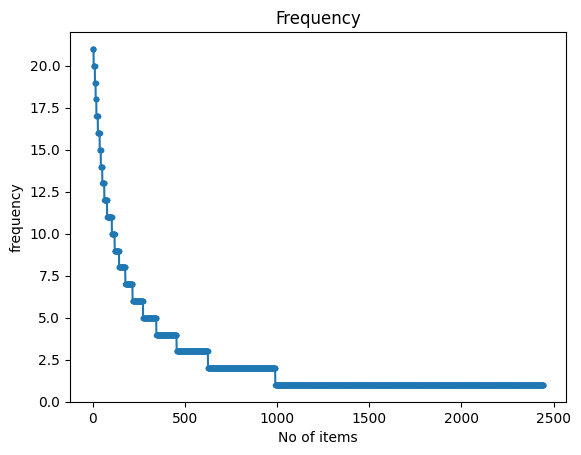

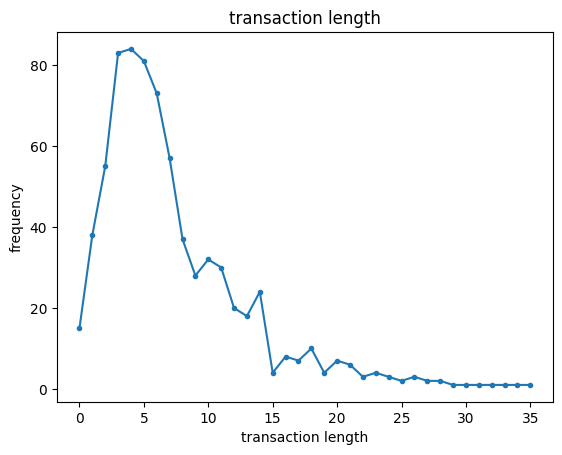

In [87]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [88]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.006177186965942383


In [89]:
obj1.save('td_freq_db_nostalgia.csv') #save the patterns
frequentPatternsDF_sci_med

Patterns  Support
0        find        9
1        down        9
2         few        9
3         its        9
4        sure        9
..        ...      ...
175      ever       28
176     would       28
177        go       28
178     takes       30
179  favorite       30

[180 rows x 2 columns]

In [90]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.004999637603759766


In [91]:
obj1.save('td_freq_db_not nostalgia.csv') #save the patterns
frequentPatternsDF_sci_med

Patterns  Support
0    favorites        9
1      special        9
2         soul        9
3         mind        9
4           60        9
..         ...      ...
139      every       21
140      loved       21
141    classic       21
142       them       21
143     lyrics       21

[144 rows x 2 columns]

#### 4.4 Discretization and Binarization


In [92]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.sentiment)

LabelBinarizer()

In [93]:
from sklearn.preprocessing import MultiLabelBinarizer
X['bin_sentiment'] = mlb.fit_transform(X['sentiment']).tolist()
#X['sentiment_transformed'] = mlb.fit_transform(X['sentiment'].apply(lambda x: [x] if isinstance(x, str) else x)).tolist()
#X['bin_sentiment'] = mlb.transform(X['sentiment']).tolist() 
X[0:5]

sentiment                                                                                                                                                                                                                                                                                                                                                                            comment                                                                                                                                                                                                                                                                                                                                                                                                                                                                  unigrams bin_sentiment
0  not nostalgia                                                                                 He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.                                                                                           [He, was, a, singer, with, a, golden, voice, that, I, love, to, hear, all, the, time, ., I, was, his, great, fan, at, the, age, of, 16years, in, those, days, and, still, now, ., Although, we, have, many, singers, now, ,, but, ,, I, can, vouch, for, Jim, Reeves, all, the, time, ., You, feel, relaxed, ,, emotional, and, loving, ., Thank, you, Lord, for, his, life, .]           [1]
1      nostalgia                                                                                                                                                                                                                                                  The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel                                                                                                                                                                                                                                                                                                              [The, mist, beautiful, voice, ever, I, listened, to, him, when, I, was, a, kid, and, still, love, his, singing, Never, forgotten, The, voice, of, an, angel]           [0]
2      nostalgia  I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.  [I, have, most, of, Mr., Reeves, songs, ., Always, love, his, smooth, voice, ,, so, comforting, and, sounds, like, the, people, I, grew, up, around, ., They, were, so, gentle, and, sweet, ,, but, I, had, to, leave, my, little, town, to, find, a, job, at, age, 17, ., I, graduated, early, ., I, never, forgot, how, great, it, was, to, grow, up, with, simple, people, who, had, no, pretensions, --, just, loving, and, gentle, ,, like, I, think, Jesus, is, .]           [0]
3  not nostalgia                                       30 day leave from 1st tour in Viet Nam to convince my Mary Lou to "marry me" when I came back from my 2nd tour.  Now, 47 years later this December God granted the greatest blessing a man can receive.  This song is for the hope of life all who have served pray for and some are granted that hope to be reality. Thank you my Mary Lou.                                           [30, day, leave, from, 1st, tour, in, Viet, Nam, to, convince, my, Mary, Lou, to, ``, marry, me, '', when, I, came, back, from, my, 2nd, 

### 5. Data Exploration

In [94]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [95]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['My grandma really loved elvis ???s music .. so we played this song at her funeral .. everytime i listen to this Song there are so many memories in my head']
["My grandad listens this on a CD with me and I learned the words but sadly he passed away and we will miss and love him I lost him when I'm 11 I will always miss him:("]


In [96]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [97]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity Cos=the angle between the two vectors
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)[0, 0]
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)[0, 0]
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)[0, 0]

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)[0, 0]
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)[0, 0]
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)[0, 0]

# Print results
print("Cosine Similarity using count between 1 and 2: %(x)f" % {"x": cos_sim_count_1_2})
print("Cosine Similarity using count between 1 and 3: %(x)f" % {"x": cos_sim_count_1_3})
print("Cosine Similarity using count between 2 and 3: %(x)f" % {"x": cos_sim_count_2_3})

print("Cosine Similarity using count between 1 and 1: %(x)f" % {"x": cos_sim_count_1_1})
print("Cosine Similarity using count between 2 and 2: %(x)f" % {"x": cos_sim_count_2_2})
print("Cosine Similarity using count between 3 and 3: %(x)f" % {"x": cos_sim_count_3_3})


Cosine Similarity using count between 1 and 2: 0.124611
Cosine Similarity using count between 1 and 3: 0.170251
Cosine Similarity using count between 2 and 3: 0.121988
Cosine Similarity using count between 1 and 1: 1.000000
Cosine Similarity using count between 2 and 2: 1.000000
Cosine Similarity using count between 3 and 3: 1.000000


As expected, cosine similarity between a sentence and itself is 1. Between 2 entirely different sentences, it will be 0.

We can assume that we have the more common features in the documents 1 and 3 than in documents 1 and 2. 

This reflects indeed in a higher similarity than that of sentences 1 and 3.

### 6. Data Classification

In [98]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Ensure 'sentiment' is a string, not a list, by joining elements if it's a list
X['sentiment'] = X['sentiment'].apply(lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x)

# Create a mapping between sentiment and comment
sentiment_mapping = dict(X[['sentiment', 'comment']].drop_duplicates().values)
from sklearn.feature_extraction.text import CountVectorizer

# Ensure `X['comment']` has the same length as `X['sentiment']`
vectorizer = CountVectorizer()
tdm_df = vectorizer.fit_transform(X['comment'])

# Check if the lengths match
if tdm_df.shape[0] == len(X['sentiment']):
    X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['sentiment'], test_size=0.3, random_state=42)
else:
    print("Data length still mismatched.")

# Convert numeric labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

# Verify if `tdm_df` rows match the length of `X['sentiment']`
if tdm_df.shape[0] == len(X['sentiment']):
    X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['sentiment'], test_size=0.3, random_state=42)
else:
    print("Data length still mismatched.")

# Convert numeric labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]


In [99]:
X_train

<1050x3730 sparse matrix of type '<class 'numpy.int64'>'
	with 22041 stored elements in Compressed Sparse Row format>

In [100]:
X_test

<450x3730 sparse matrix of type '<class 'numpy.int64'>'
	with 9219 stored elements in Compressed Sparse Row format>

In [101]:
# Assume `sentiment_mapping` is a mapping from sentiment IDs to names, e.g., {0: 'positive', 1: 'negative', 2: 'neutral'}
sentiment_mapping = {0: 'not nostalgia', 1: 'nostalgia'}  # Adjust according to your actual mapping

# Define target_names as the list of sentiment names from the mapping
target_names = list(sentiment_mapping.values())

# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['sentiment'], test_size=0.3, random_state=42)


Accuracy: 0.8422222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.7917    0.9289    0.8548       225
    nostalgia     0.9140    0.7556    0.8273       225

     accuracy                         0.8422       450
    macro avg     0.8528    0.8422    0.8410       450
 weighted avg     0.8528    0.8422    0.8410       450



In [102]:
# Use CountVectorizer to convert text into a document-term frequency matrix
vectorizer = CountVectorizer()
augmented_df = vectorizer.fit_transform(X['comment'])

# Check if the dimensions of the transformed matrix match
if augmented_df.shape[0] == len(X['sentiment']):
    # Data lengths match; proceed with data splitting
    X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['sentiment'], test_size=0.3, random_state=42)
else:
    print("Data length mismatch: augmented_df and X['sentiment'] have different lengths.")


In [103]:
X_train

<1050x3730 sparse matrix of type '<class 'numpy.int64'>'
	with 22041 stored elements in Compressed Sparse Row format>

In [104]:
X_test

<450x3730 sparse matrix of type '<class 'numpy.int64'>'
	with 9219 stored elements in Compressed Sparse Row format>

In [105]:
# Assume `sentiment_mapping` is a mapping from sentiment IDs to names, e.g., {0: 'positive', 1: 'negative', 2: 'neutral'}
sentiment_mapping = {0: 'not nostalgia', 1: 'nostalgia'} 

# Define target_names as a list of sentiment names from the mapping
target_names = list(sentiment_mapping.values())

# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))


Accuracy: 0.8422222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.7917    0.9289    0.8548       225
    nostalgia     0.9140    0.7556    0.8273       225

     accuracy                         0.8422       450
    macro avg     0.8528    0.8422    0.8410       450
 weighted avg     0.8528    0.8422    0.8410       450



## **Part3- Tasks**

### 1. New data visualizations

<Figure size 1000x600 with 0 Axes>

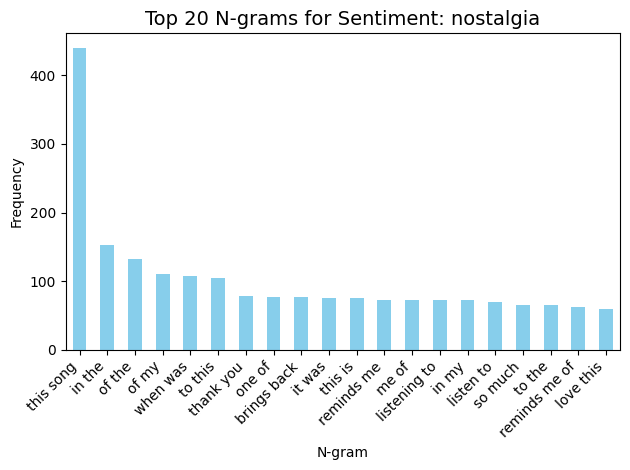

In [119]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Define the mapping from numeric sentiment to labels
sentiment_mapping = {0: "not nostalgia", 1: "nostalgia"}

# Function to plot top n-grams
def plot_top_ngrams(corpus, n=10, sentiment_label=""):
    vec = CountVectorizer(ngram_range=(2, 3), max_features=n).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    rslt = pd.DataFrame(words_freq[:n], columns=['N-gram', 'Frequency'])
    
    # Plotting
    plt.figure(figsize=(10, 6))
    rslt.plot(kind='bar', x='N-gram', y='Frequency', legend=False, color="skyblue")
    plt.title(f"Top {n} N-grams for Sentiment: {sentiment_label}", fontsize=14)
    plt.xlabel("N-gram")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Ensure sentiment column is in integer format
X['sentiment'] = X['sentiment'].map(lambda x: 0 if x == "not nostalgia" else 1)

# Plot top n-grams separately for each sentiment category
for sentiment in X['sentiment'].unique():
    sentiment_label = sentiment_mapping[sentiment]
    plot_top_ngrams(X[X['sentiment'] == sentiment]['comment'], n=20, sentiment_label=sentiment_label)


### 2. TF-IDF features

### 3. Naive Bayes classifier

## **Part4- Inefficient**

1. Data Selection and Loading:

When loading data with fetch_20newsgroups, random shuffling is applied to ensure dataset consistency. Reloading and shuffling with each run would consume additional computational resources. Therefore, it’s more efficient to save the shuffled dataset for direct reuse, avoiding redundant operations each time.

When importing data into a DataFrame, filtering out unnecessary columns and retaining only those relevant to model training can save memory and enhance processing efficiency.

2. Text Cleaning Steps:

For effective feature extraction in textual data, removing stop words, punctuation, and unnecessary whitespace can enhance feature extraction. If stop words are not removed using the stop_words parameter in CountVectorizer or TfidfVectorizer, consider adding this parameter or creating a custom stop words list to improve model performance.

3. Feature Extraction Optimization:

When using CountVectorizer or TfidfVectorizer for term frequency statistics, adjust parameters like max_features or min_df (minimum term frequency) to minimize the influence of irrelevant words. This allows key features to be retained while lowering computational load.

4. Class Balance Handling:

Imbalanced class distributions may exist in the data. Use undersampling or oversampling during preprocessing to balance class distribution, reducing the impact of imbalance on model performance.